<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 4 - AutoEncoder
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [ ]:
# Set your student number
student_number = 98101822
Name = 'یلدا'
Last_Name = 'شعبان زاده'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Rules
- You **are** allowed to add or remove cells.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.

In [ ]:
import sys

address = 'AI/MPQ4/Practical'
sys.path.append(f'content/drive/MyDrive/{address}')

% cd /content/drive/MyDrive/$address

/content/drive/MyDrive/AI/MPQ4/Practical


In [ ]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./Q3.ipynb")
with open(f'python_code_Q3_{student_number}.py', 'w') as file:
    file.write(python_code)

your file will be graded


# Autoencoders (20 Extra Points)

<font size=4>
Author: Ahmad Salimi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In this problem, you should implement an autoencoder network, which generates an image presenting the next digit of the input digit. Here are some examples:

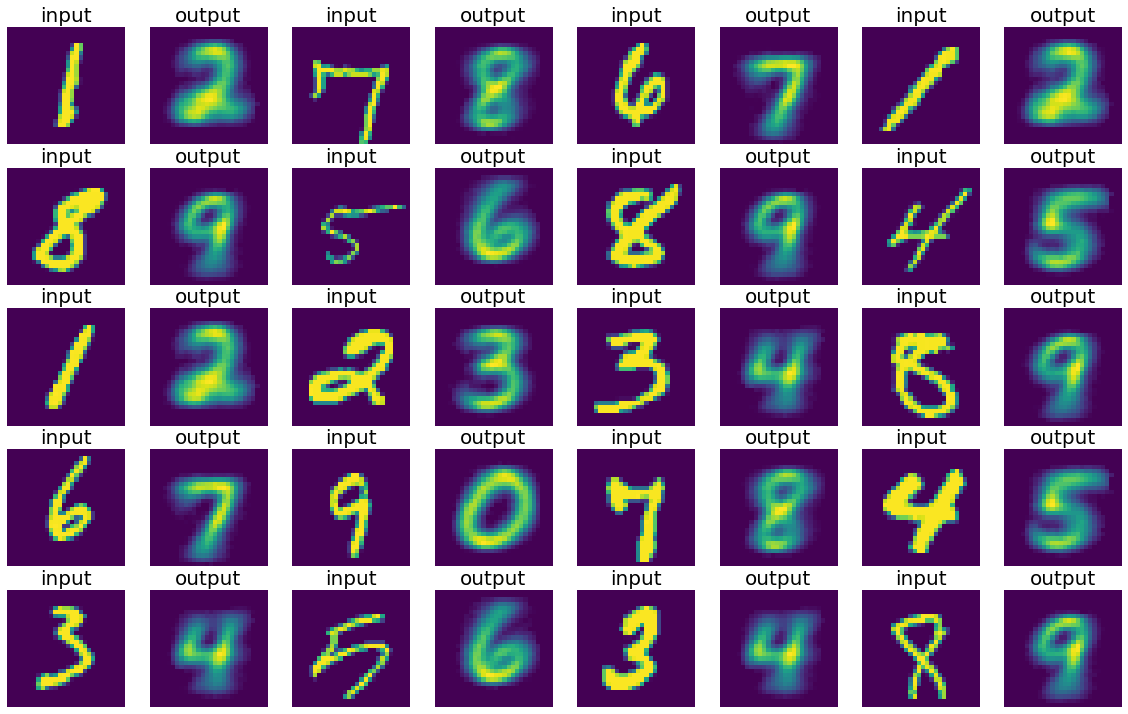


In [ ]:
import tqdm
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

from typing import Tuple
from torch.utils.data import Dataset, DataLoader

You should use the MNIST dataset, and the ground-truth for each example is provided by a helper function. Make sure to put the `ae_helper.py` file next to this notebook to use the helper function.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Get the data

Get the data and split them into training, validation, and test sets, by running the following cell. `X` is the input images, `Y` is the ground-truth for each input, and `y` is the input's label.

In [ ]:
from Helper_codes.ae_helper import get_data
from sklearn.model_selection import train_test_split

X, Y, y = get_data()

X_train, X_test, Y_train, Y_test, y_train, y_test = train_test_split(X, Y, y, test_size=0.2, random_state=17)
X_train, X_val, Y_train, Y_val, y_train, y_val = train_test_split(X_train, Y_train, y_train, test_size=0.1, random_state=17)

## Design your model

Please Implement your autoencoder model below. You MUST implement your model using the `torch` package. The model should input a batch of images and output the generated images for the whole batch. Your model can be consist of fully connected layers (using linear layers), but using fully-convolutional models has extra points.

In [ ]:
class MnistAutoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2, padding=1),
            nn.MaxPool2d((2, 2)),
            nn.ReLU(True),
            nn.Conv2d(8, 64, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(64, 256, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 10, 3, stride=2, padding=1),
            nn.ReLU(True)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(10, 256, 3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 64, 3, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 8, 2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2),
            nn.ReLU(True)
        )


    def forward(self, x) -> torch.Tensor:
        x = self.encoder(x)
        x = self.decoder(x)
        return x

## The dataset class, and the dataloaders

The following cells implement the dataset class and create the data loaders for training and validation sets. Feel free to modify the batch size for each data loader.

In [ ]:
class MnistNextDigitDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.y = torch.from_numpy(y)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int) -> Tuple[torch.Tensor, ...]:
        return self.X[i], self.Y[i], self.y[i]

In [ ]:
train_dataloader = DataLoader(
    MnistNextDigitDataset(X_train, Y_train, y_train),
    batch_size=128,
    shuffle=True
)
val_dataloader = DataLoader(
    MnistNextDigitDataset(X_val, Y_val, y_val),
    batch_size=256,
    shuffle=False
)

## Instantiate the model and optimizer

Instantiate your model and optimizer in the following cell. Feel free to choose the optimizer and its configurations such as learning rate, decay, etc.

In [ ]:
learning_rate = 1e-3

model = MnistAutoencoder().to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate
)

In [ ]:
model

MnistAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(8, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(256, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(10, 256, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(256, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(64, 8, kernel_size=(2, 2), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2))
    (7): ReLU(inplace=True)
  )
)

## Train your autoencoder

Write your training/validation loop in the following cell for an arbitrary number of epochs (until convergence is detected). Make sure to use proper and readable logging containing training and validation metrics for each epoch. Select and store the state dictionary of the best epoch model according to the metrics.

In [ ]:
def train_epoch(
    model: nn.Module,
    criterion: nn.Module, 
    optimizer: torch.optim.Optimizer, 
    dataloader: torch.utils.data.DataLoader
) -> int:
    train_loss = 0

    model.train()
    for _, (x, y, _) in enumerate(dataloader):
        x = x.reshape(-1, 1, 28, 28).to(device)
        y = y.reshape(-1, 1, 28, 28).to(device)
        outputs = model(x)

        loss = criterion(outputs, y)
        epoch_loss = loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += epoch_loss * dataloader.batch_size

    return train_loss

In [ ]:
def eval_epoch(
    model: nn.Module,
    criterion: nn.Module,
    dataloader: torch.utils.data.DataLoader,
    test: bool = False
) -> int:
    val_loss = 0

    model.eval()
    with torch.no_grad():
        for _, (x, y, _) in enumerate(dataloader):
            x = x.reshape(-1, 1, 28, 28).to(device)
            y = y.reshape(-1, 1, 28, 28).to(device)
            outputs = model(x)

            loss = criterion(outputs, y)
            epoch_loss = loss.item()

            val_loss += epoch_loss * dataloader.batch_size

    return val_loss

In [ ]:
num_epochs = 15
least_loss = float('inf')
train_loss_arr, val_loss_arr = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, criterion, optimizer, train_dataloader)
    val_loss = eval_epoch(model, criterion, val_dataloader)

    train_loss /= len(train_dataloader.dataset)
    val_loss /= len(val_dataloader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)

    if train_loss < least_loss:
        least_loss = train_loss
        best_epoch_dict = model.state_dict().copy()

    print(f'[Epoch {epoch}]\t'
        f'Train Loss: {train_loss:.4f}\t'
        f'Validation Loss: {val_loss:.4f}\t'
    )

[Epoch 0]	Train Loss: 0.0716	Validation Loss: 0.0650	
[Epoch 1]	Train Loss: 0.0608	Validation Loss: 0.0583	
[Epoch 2]	Train Loss: 0.0568	Validation Loss: 0.0565	
[Epoch 3]	Train Loss: 0.0558	Validation Loss: 0.0560	
[Epoch 4]	Train Loss: 0.0552	Validation Loss: 0.0555	
[Epoch 5]	Train Loss: 0.0550	Validation Loss: 0.0553	
[Epoch 6]	Train Loss: 0.0548	Validation Loss: 0.0551	
[Epoch 7]	Train Loss: 0.0546	Validation Loss: 0.0551	
[Epoch 8]	Train Loss: 0.0546	Validation Loss: 0.0551	
[Epoch 9]	Train Loss: 0.0545	Validation Loss: 0.0550	
[Epoch 10]	Train Loss: 0.0544	Validation Loss: 0.0550	
[Epoch 11]	Train Loss: 0.0543	Validation Loss: 0.0550	
[Epoch 12]	Train Loss: 0.0543	Validation Loss: 0.0550	
[Epoch 13]	Train Loss: 0.0542	Validation Loss: 0.0550	
[Epoch 14]	Train Loss: 0.0542	Validation Loss: 0.0550	


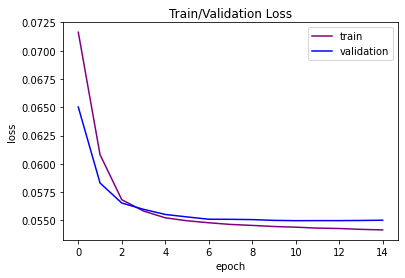

In [ ]:
def plot_loss(train_loss, val_loss, epochs):
    plt.plot(epochs, train_loss, color='purple', label='train')
    plt.plot(epochs, val_loss, color='blue', label='validation')
    plt.title(f'Train/Validation Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

plot_loss(train_loss_arr, val_loss_arr, list(range(num_epochs)))

## Load the state dictionary of the best epoch

Load the state dictionary of the best epoch model into the model object.

In [ ]:
model.load_state_dict(best_epoch_dict)

<All keys matched successfully>

## Visualize your model

Select 40 examples from the test set and visualize the input and output of the model for them (See the examples at the beginning of the notebook).

In [ ]:
def plot(imgs, nrows, ncols, titles=None, **imshow_kwargs):
    assert len(imgs) <= nrows * ncols

    _, axs = plt.subplots(
        nrows=nrows, ncols=ncols, squeeze=False,
        figsize=(ncols * 4, nrows * 4)
    )
    for row_idx in range(nrows):
        for col_idx in range(ncols):
            idx = row_idx * ncols + col_idx
            ax = axs[row_idx, col_idx]
            if titles and len(titles) > idx:
                ax.set(title=titles[idx])
                ax.title.set_size(12)
            ax.imshow(np.asarray(imgs[idx][0]), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

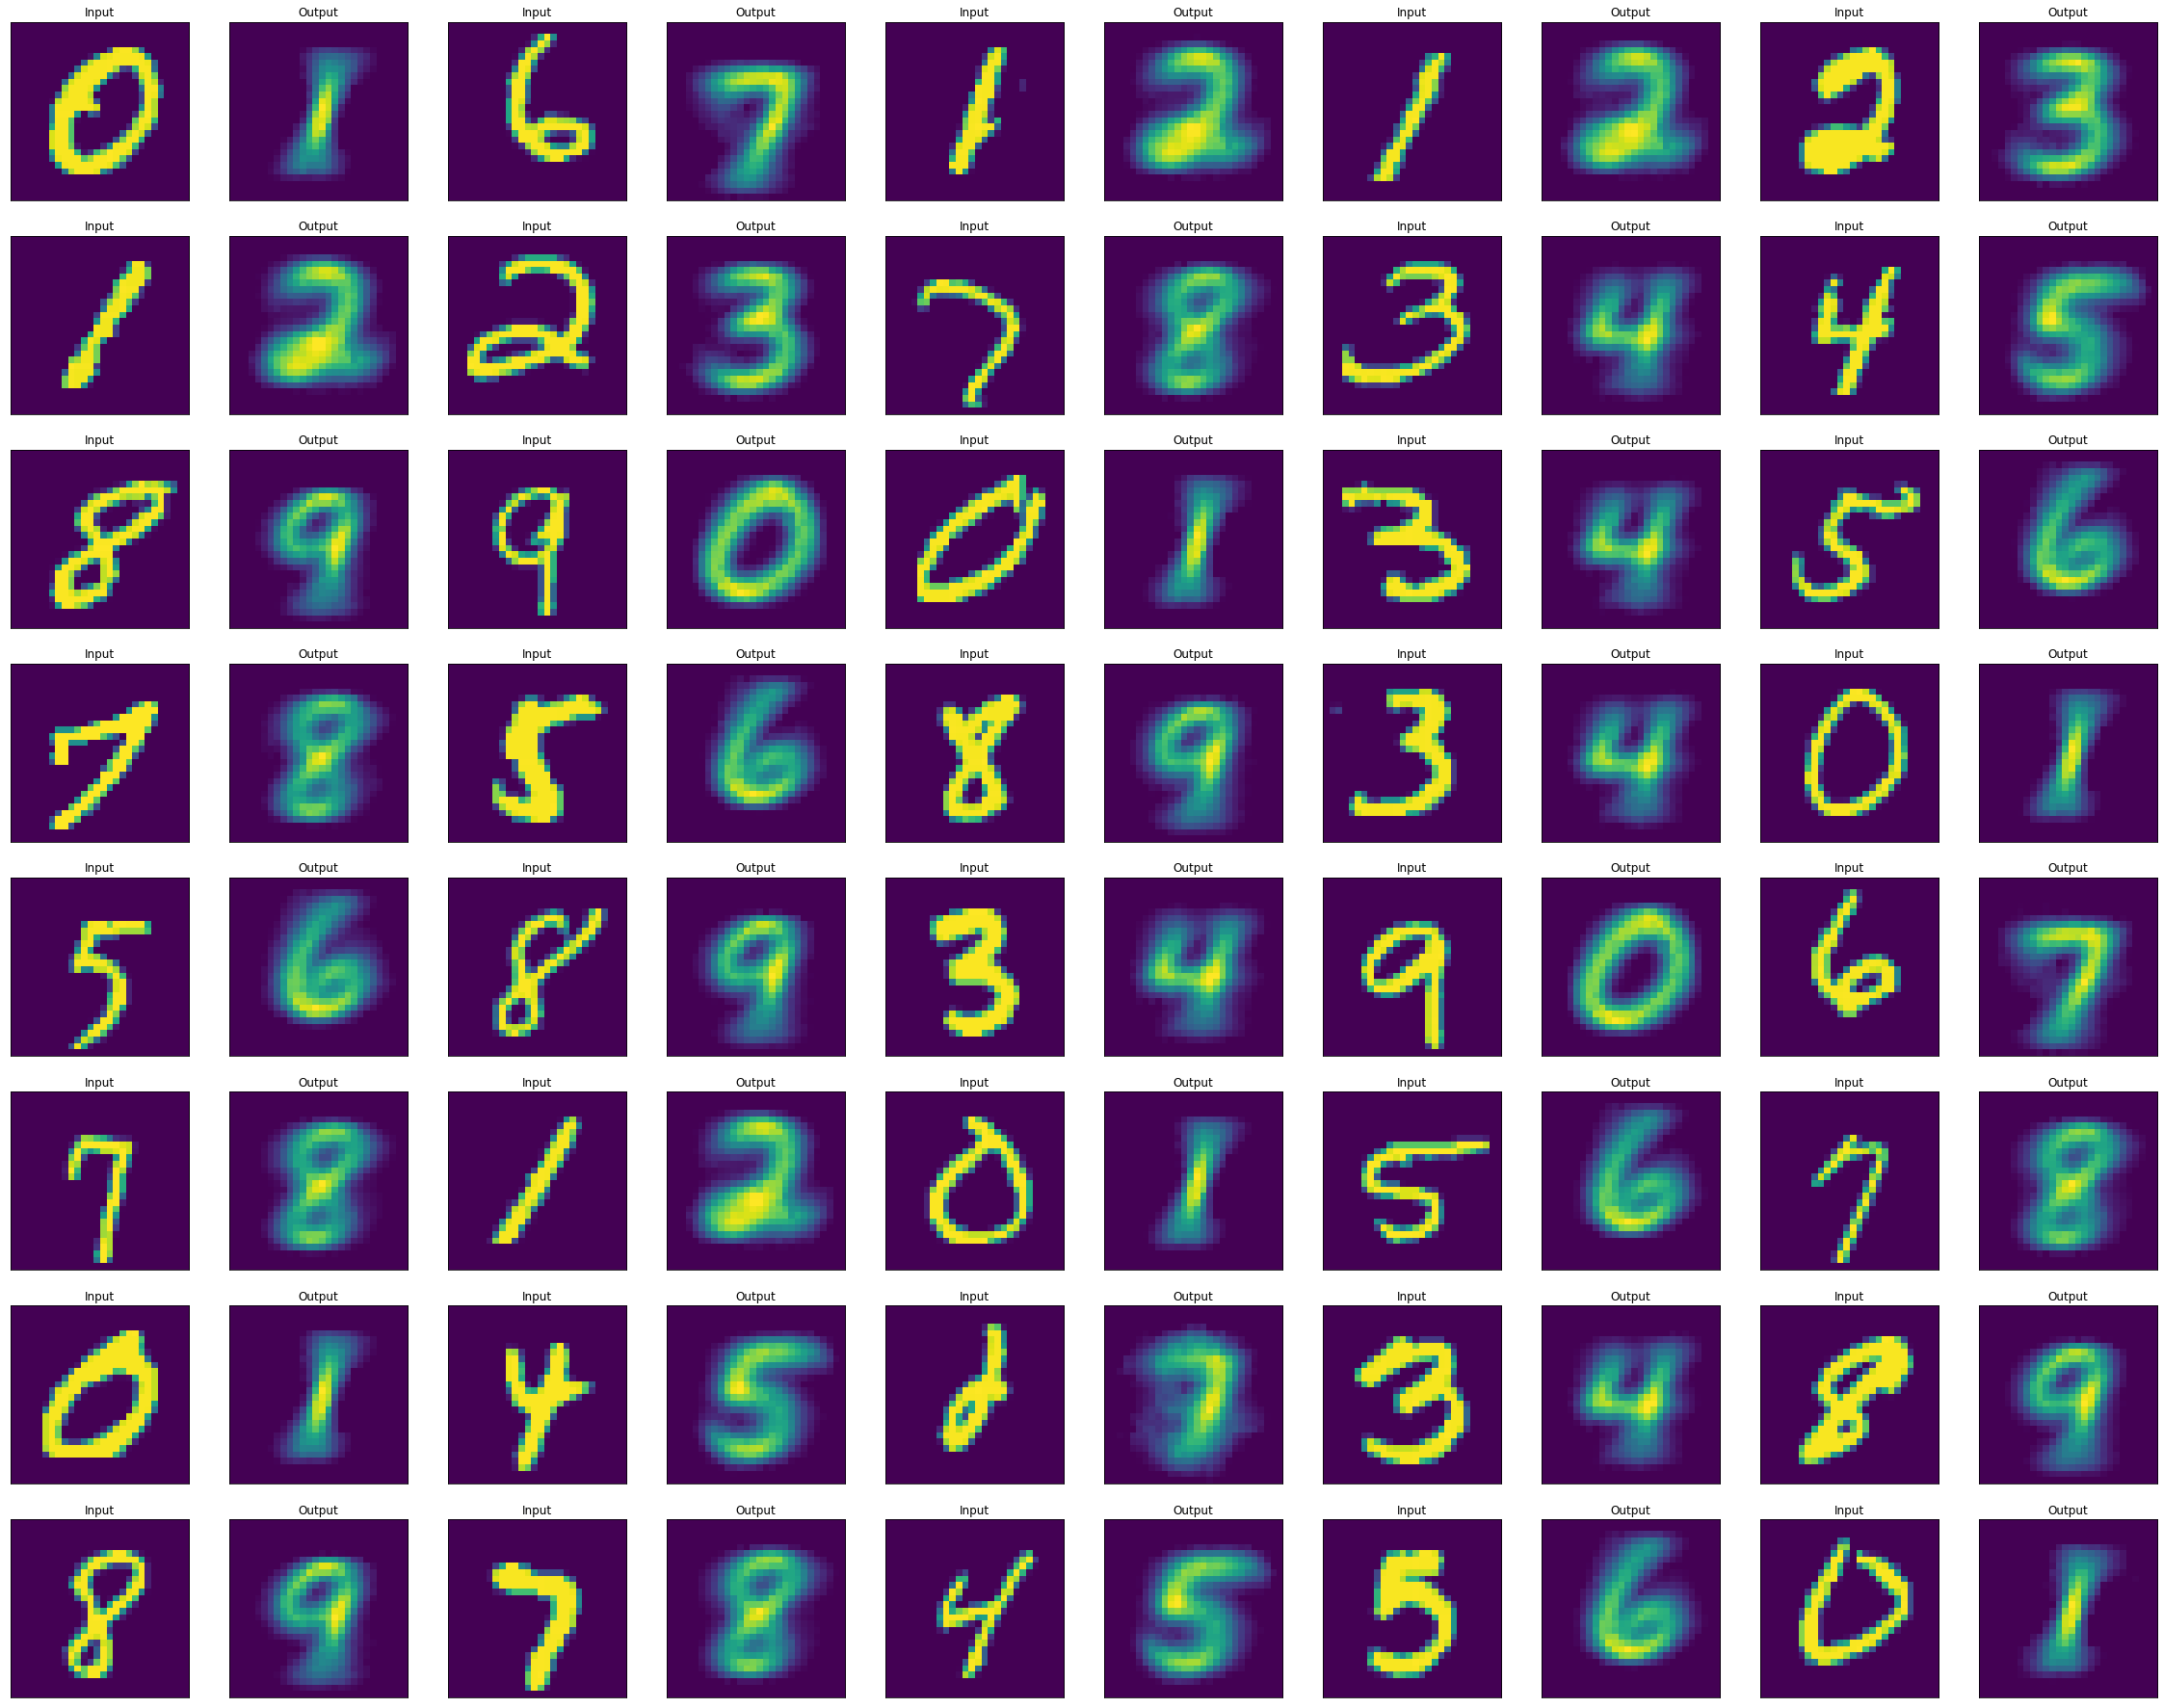

In [ ]:
def get_plot_input(model, dataset, count):
    idxs = torch.randint(len(dataset), (count,))
    imgs = []
    labels = []
    for idx in idxs:
        inp = dataset[idx]
        out = model(
                torch.from_numpy(inp.reshape(-1, 1, 28, 28)).to(device)
              ).reshape(-1, 28, 28)
        imgs.append(inp.reshape(-1, 28, 28).tolist())
        labels.append('Input')

        imgs.append(out.tolist())
        labels.append('Output')

    return imgs, labels

model.eval()
images, labels = get_plot_input(model, X_test, 40)
plot(images, 8, 10, labels)